Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025.csv


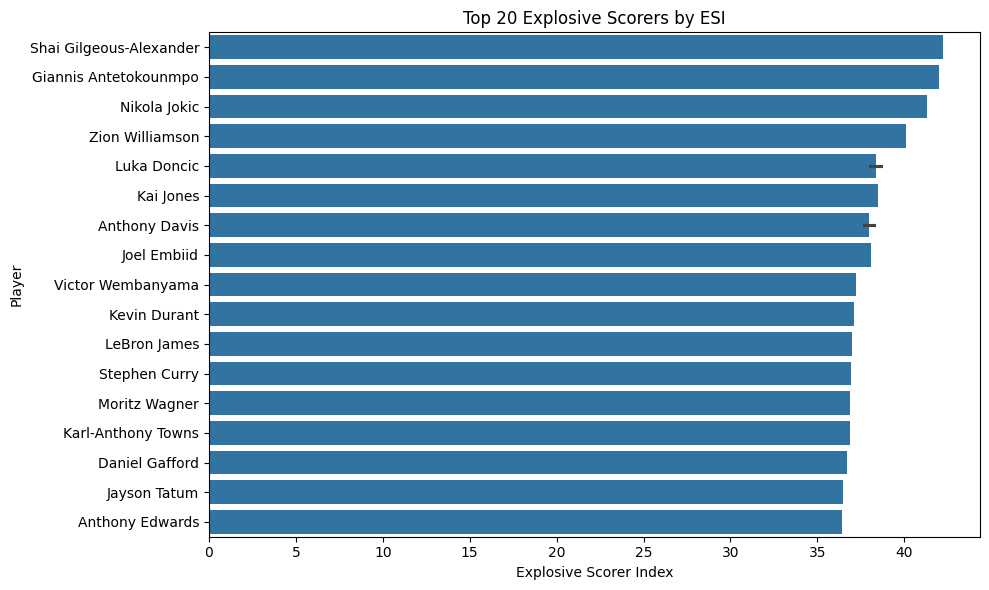

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# 📦 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# 📁 Upload NBA advanced stats CSV
uploaded = files.upload()
df = pd.read_csv('nba_advanced_stats_2024_2025.csv')

# 🧹 Filter out low-sample / irrelevant players
df_filtered = df[(df['VORP'] > 0.1) & (df['WS'] > 0.1) & (df['PER'] > 5)]

# ❌ Drop missing values in required columns
required_cols = ['USG%', 'PER', 'TS%']
df_esi = df_filtered.dropna(subset=required_cols)

# 🔥 Compute Explosive Scorer Index (ESI)
df_esi['ESI'] = (
    0.4 * df_esi['USG%'] +
    0.3 * df_esi['PER'] +
    0.3 * df_esi['TS%'] * 100  # TS% scaled
)

# 🏀 Get Top 20 by ESI
top_esi = df_esi.sort_values(by='ESI', ascending=False).head(20)

# 📈 Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='ESI', y='Player', data=top_esi)
plt.title('Top 20 Explosive Scorers by ESI')
plt.xlabel('Explosive Scorer Index')
plt.ylabel('Player')
plt.tight_layout()

# 💾 Save plot as PNG
plt.savefig('explosive_scorer_index.png')
plt.show()

# 📤 Export CSV + download
top_esi.to_csv("top20_esi.csv", index=False)
files.download("top20_esi.csv")
files.download("explosive_scorer_index.png")
